In [1]:
%pylab inline
import tqdm
import ipywidgets as ipw
import os 
plt.rcParams["font.size"]=20

Populating the interactive namespace from numpy and matplotlib


In [51]:
# specify folder from which we read data
folder='Sim_LAMMPS_LCBOP_LosFasolino_2003_C__SM_469631949122_000_Big_sample/'
# find latst file 
mmm=!ls -lt $folder/out.graphene_*|head -1|sed  -e 's/_/ /g'
mmm=int(mmm[0].split()[-1])
first=100
step=100

In [52]:
# read data
if (not os.path.exists(folder+"/bindata.npy")):
    dat=array([loadtxt(f'{folder}/out.graphene_{i}',skiprows=9)[:,:] 
           for i in tqdm.tqdm(arange(first,mmm,step))])
    save(folder+"/bindata",dat)
else:
    dat=load(folder+"/bindata.npy")


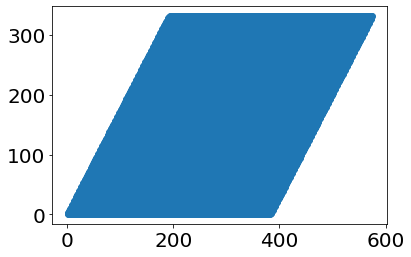

In [53]:
plot(*dat[0,:,[2,3]],'o')

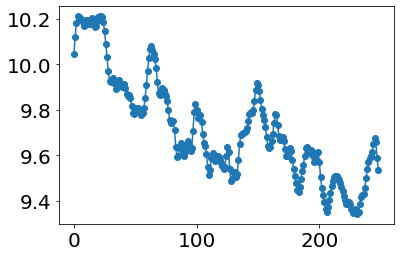

In [54]:
plot(dat[:,10001,4],'o-')

In [55]:
N_time=dat.shape[0]
N_uc=int(sqrt(dat.shape[1]/2))

dt=(1e-4)*step
w_max=1/dt
wran=linspace(0,w_max/2,N_time//2+1)*4.136

#1 THz = 4.136 meV = 33.356 cm−1; 
#1 meV = 0.242 THz = 8.066 cm−1; 
#1 cm−1 = 0.030 THz = 0.124 meV .

In [60]:
FT=zeros((N_time//2+1,N_uc,N_uc),dtype=float)
for i in [5,6,7]:
    A=dat[:,0::2,i].reshape(N_time,N_uc,N_uc)
    B=dat[:,1::2,i].reshape(N_time,N_uc,N_uc)
    #A=A-A[0,:,:]
    #B=B-B[0,:,:]
    FT+=abs(fft.ifft2(
        fft.rfft(A,axis=0),
        axes=(-2,-1)))+\
    abs(fft.ifft2(
        fft.rfft(B,axis=0),
        axes=(-2,-1)))

In [61]:
path_1=hstack([arange(N_uc//2),arange(N_uc//2,0,-1)])
path_2=hstack([arange(N_uc//2),arange(N_uc//2,N_uc)])
len(arange(N_uc//2)),len(arange(N_uc//2,N_uc)),2/sqrt(3)

(78, 78, 1.1547005383792517)

In [62]:
b1,b2=array([1/2,sqrt(3)/2]),array([1/2,-sqrt(3)/2])
x,y=meshgrid(linspace(0,1,N_uc),
             linspace(0,1,N_uc))
X=x*b1[0]+y*b2[0]
Y=x*b1[1]+y*b2[1]

In [63]:

@ipw.interact(i=(0,N_time//2))
def play(i):
    figure(figsize=(4,6))
    pcolormesh(X,Y,FT[i,:,:])
    pcolormesh(X+b1[0],Y+b1[1],FT[i,:,:])
    pcolormesh(X+b2[0],Y+b2[1],FT[i,:,:])
    pcolormesh(X+b2[0]+b1[0],Y+b2[1]+b1[1],FT[i,:,:])
    #plot(path_1,path_2,'r--')
    clim(0,10)
    axis('equal')
    #xticks([])
    #yticks([])
    plot(*((2*b1+b2)/3),'r+')
    plot(*((b1+2*b2)/3),'r+')
    #text(*((2*b1+b2)/3),"K")

interactive(children=(IntSlider(value=62, description='i', max=124), Output()), _dom_classes=('widget-interact…

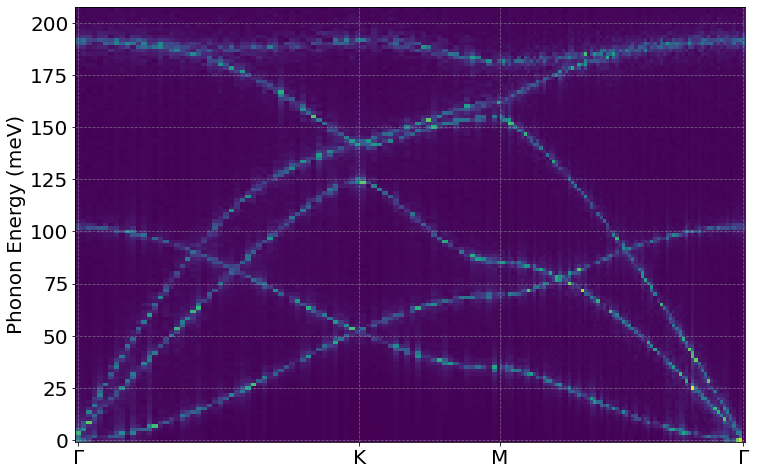

In [64]:
figure(figsize=(12,8))
pcolormesh(hstack([linspace(0,sqrt(3),path_1.shape[0]//2),   # in order to take proper arc lengths in the BZ
        linspace(sqrt(3),sqrt(3)+1,path_1.shape[0]//2)]),    # in to account 
           wran,
           FT[:,path_1[::-1],path_2[::-1]])
xticks([0,2*sqrt(3)/3,sqrt(3),sqrt(3)+1],[r"$\Gamma$","K","M",r"$\Gamma$"])
#colorbar()
#clim(0,50)
ylabel("Phonon Energy (meV)")
#ylim(0,210)
grid(ls='--',alpha=0.5);

![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fsrep12923/MediaObjects/41598_2015_Article_BFsrep12923_Fig2_HTML.jpg?as=webp)

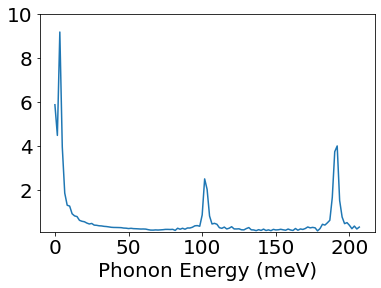

In [12]:
@ipw.interact(i=(0,FT[:,path_1[::-1],path_2[::-1]].shape[1]-1))
def play(i=0):
    plot(wran,FT[:,path_1[::-1],path_2[::-1]][:,i])
    xlabel("Phonon Energy (meV)")
    ylim(0.1,10)